In [1]:
pip install opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(download_url, force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: saman8899
Your Kaggle Key: ········
Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents


100%|████████████████████████████████████████████████████████████████████████████████| 653M/653M [23:27<00:00, 486kB/s]


In [3]:
data_filename = './us-accidents/US_Accidents_March23.csv'

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import numpy as np


In [5]:
data1 = pd.read_csv(data_filename)
data = data1.sample(n = 10000)
data

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7039365,A-7088690,Source1,2,2020-06-15 10:23:12,2020-06-15 10:53:12,35.146930,-80.926120,35.146930,-80.926120,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1497750,A-1507589,Source2,2,2020-06-16 17:20:26,2020-06-16 18:25:03,33.496731,-81.292747,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
1590244,A-1600088,Source2,3,2020-01-18 22:25:46,2020-01-18 22:54:56,33.915821,-84.406342,NaN,NaN,0.000,...,False,False,False,False,False,False,Night,Night,Night,Night
3014316,A-3024195,Source2,3,2018-02-21 11:24:18,2018-02-21 11:53:52,40.987434,-73.671532,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
2305669,A-2315537,Source3,2,2019-01-03 06:57:42,2019-01-03 07:27:10,43.044147,-87.926109,NaN,NaN,0.000,...,False,False,False,False,False,False,Night,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4809082,A-4845574,Source1,2,2022-12-07 16:21:30,2022-12-07 17:12:00,45.041245,-93.061409,45.072021,-93.053128,2.164,...,False,False,False,False,False,False,Day,Day,Day,Day
2564647,A-2574519,Source2,2,2018-09-10 20:26:18,2018-09-10 20:55:33,30.236486,-97.840118,NaN,NaN,0.000,...,False,False,False,False,False,False,Night,Night,Day,Day
5073838,A-5112293,Source1,2,2022-05-17 13:08:00.000000000,2022-05-17 13:35:00.000000000,35.670821,-78.604050,35.681314,-78.603704,0.725,...,False,False,False,False,False,False,Day,Day,Day,Day
7709553,A-7758921,Source1,2,2019-07-15 13:27:17,2019-07-15 13:56:28,26.280160,-80.125260,26.268950,-80.126320,0.777,...,False,False,False,False,False,False,Day,Day,Day,Day


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 7039365 to 6719466
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10000 non-null  object 
 1   Source                 10000 non-null  object 
 2   Severity               10000 non-null  int64  
 3   Start_Time             10000 non-null  object 
 4   End_Time               10000 non-null  object 
 5   Start_Lat              10000 non-null  float64
 6   Start_Lng              10000 non-null  float64
 7   End_Lat                5571 non-null   float64
 8   End_Lng                5571 non-null   float64
 9   Distance(mi)           10000 non-null  float64
 10  Description            10000 non-null  object 
 11  Street                 9986 non-null   object 
 12  City                   10000 non-null  object 
 13  County                 10000 non-null  object 
 14  State                  10000 non-null  object 
 15 

In [7]:
data.isnull().sum()

ID                          0
Source                      0
Severity                    0
Start_Time                  0
End_Time                    0
Start_Lat                   0
Start_Lng                   0
End_Lat                  4429
End_Lng                  4429
Distance(mi)                0
Description                 0
Street                     14
City                        0
County                      0
State                       0
Zipcode                     2
Country                     0
Timezone                   11
Airport_Code               27
Weather_Timestamp         152
Temperature(F)            210
Wind_Chill(F)            2574
Humidity(%)               221
Pressure(in)              182
Visibility(mi)            231
Wind_Direction            229
Wind_Speed(mph)           724
Precipitation(in)        2817
Weather_Condition         219
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction  

In [8]:
columns = ['End_Lat', 'End_Lng', 'Street', 'City', 'Zipcode', 'Timezone', 'Airport_Code', 
    'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 
    'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 
    'Precipitation(in)', 'Weather_Condition', 'Sunrise_Sunset', 
    'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

data_cleaned = data.dropna(subset = columns)
data_cleaned



,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7039365,A-7088690,Source1,2,2020-06-15 10:23:12,2020-06-15 10:53:12,35.146930,-80.926120,35.146930,-80.926120,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
7193338,A-7242699,Source1,2,2020-01-29 05:25:00,2020-01-29 06:23:08,33.774764,-118.086451,33.774764,-118.086451,0.000,...,False,False,False,False,False,False,Night,Night,Night,Day
7234144,A-7283507,Source1,2,2020-01-05 17:38:00,2020-01-05 18:31:03,44.952300,-93.084550,44.952300,-93.084550,0.000,...,False,False,False,False,False,False,Night,Night,Day,Day
5364299,A-5405047,Source1,2,2022-04-25 16:50:07.000000000,2022-04-25 18:53:10.000000000,28.388226,-81.404655,28.387077,-81.403640,0.101,...,False,False,False,False,False,False,Day,Day,Day,Day
4539670,A-4574066,Source1,2,2022-08-03 13:45:58,2022-08-03 13:59:05,45.093560,-93.188012,45.102804,-93.188054,0.639,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4691688,A-4727286,Source1,2,2022-03-04 14:36:09,2022-03-04 16:47:11,25.890070,-80.190574,25.890934,-80.186124,0.283,...,False,False,True,False,False,False,Day,Day,Day,Day
4809082,A-4845574,Source1,2,2022-12-07 16:21:30,2022-12-07 17:12:00,45.041245,-93.061409,45.072021,-93.053128,2.164,...,False,False,False,False,False,False,Day,Day,Day,Day
5073838,A-5112293,Source1,2,2022-05-17 13:08:00.000000000,2022-05-17 13:35:00.000000000,35.670821,-78.604050,35.681314,-78.603704,0.725,...,False,False,False,False,False,False,Day,Day,Day,Day
7709553,A-7758921,Source1,2,2019-07-15 13:27:17,2019-07-15 13:56:28,26.280160,-80.125260,26.268950,-80.126320,0.777,...,False,False,False,False,False,False,Day,Day,Day,Day


In [9]:
df1 = data.dropna()
df1

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7039365,A-7088690,Source1,2,2020-06-15 10:23:12,2020-06-15 10:53:12,35.146930,-80.926120,35.146930,-80.926120,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
7193338,A-7242699,Source1,2,2020-01-29 05:25:00,2020-01-29 06:23:08,33.774764,-118.086451,33.774764,-118.086451,0.000,...,False,False,False,False,False,False,Night,Night,Night,Day
7234144,A-7283507,Source1,2,2020-01-05 17:38:00,2020-01-05 18:31:03,44.952300,-93.084550,44.952300,-93.084550,0.000,...,False,False,False,False,False,False,Night,Night,Day,Day
5364299,A-5405047,Source1,2,2022-04-25 16:50:07.000000000,2022-04-25 18:53:10.000000000,28.388226,-81.404655,28.387077,-81.403640,0.101,...,False,False,False,False,False,False,Day,Day,Day,Day
4539670,A-4574066,Source1,2,2022-08-03 13:45:58,2022-08-03 13:59:05,45.093560,-93.188012,45.102804,-93.188054,0.639,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4691688,A-4727286,Source1,2,2022-03-04 14:36:09,2022-03-04 16:47:11,25.890070,-80.190574,25.890934,-80.186124,0.283,...,False,False,True,False,False,False,Day,Day,Day,Day
4809082,A-4845574,Source1,2,2022-12-07 16:21:30,2022-12-07 17:12:00,45.041245,-93.061409,45.072021,-93.053128,2.164,...,False,False,False,False,False,False,Day,Day,Day,Day
5073838,A-5112293,Source1,2,2022-05-17 13:08:00.000000000,2022-05-17 13:35:00.000000000,35.670821,-78.604050,35.681314,-78.603704,0.725,...,False,False,False,False,False,False,Day,Day,Day,Day
7709553,A-7758921,Source1,2,2019-07-15 13:27:17,2019-07-15 13:56:28,26.280160,-80.125260,26.268950,-80.126320,0.777,...,False,False,False,False,False,False,Day,Day,Day,Day


In [10]:
df1.shape

(4580, 46)

In [11]:
df1.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000
mean,2.079039,36.144641,-95.284338,36.144546,-95.283894,0.845766,61.061703,59.712686,63.230786,29.369978,9.094502,7.377598,0.005336
std,0.393601,5.303663,17.845552,5.304130,17.844370,2.116444,19.383523,21.743837,22.937018,1.088011,3.070489,5.894504,0.048373
min,1.000000,25.088825,-124.215134,25.088170,-124.215053,0.000000,-15.000000,-39.000000,4.000000,20.710000,0.000000,0.000000,0.000000
25%,2.000000,33.220365,-117.536345,33.213535,-117.531614,0.065000,48.000000,46.000000,46.000000,29.190000,10.000000,3.000000,0.000000
50%,2.000000,35.842624,-87.885169,35.840733,-87.884618,0.253000,63.000000,63.000000,65.000000,29.720000,10.000000,7.000000,0.000000
75%,2.000000,40.092891,-80.248875,40.092215,-80.244441,0.889000,76.000000,76.000000,82.000000,29.970000,10.000000,10.000000,0.000000
max,4.000000,48.850955,-68.612456,48.852040,-68.612892,64.871000,109.000000,109.000000,100.000000,30.680000,90.000000,119.000000,2.360000


In [12]:
df1.duplicated().sum()

0

In [13]:
df1.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [14]:
cities = df1['City'].unique()
cities

array(['Charlotte', 'Seal Beach', 'Saint Paul', ..., 'Garden City',
       'Parkville', 'New Hartford'], dtype=object)

In [15]:
accidents_by_cities = df1['City'].value_counts()
accidents_by_cities

City
Miami           160
Los Angeles      96
Orlando          81
Dallas           80
Houston          71
               ... 
Middle Grove      1
Lost Hills        1
Conroe            1
Wytheville        1
New Hartford      1
Name: count, Length: 1656, dtype: int64

In [16]:
accidents_by_cities[:10]

City
Miami          160
Los Angeles     96
Orlando         81
Dallas          80
Houston         71
Charlotte       54
Raleigh         43
San Diego       41
Baton Rouge     40
Nashville       35
Name: count, dtype: int64

In [17]:
# Categorical columns
categorical_columns = ['Street', 'City', 'Timezone', 'Airport_Code', 'Weather_Condition', 'Sunrise_Sunset', 
                       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

In [18]:
# Numerical columns (excluding 'Weather_Timestamp' as it is not numeric)
numerical_columns = ['End_Lat', 'End_Lng', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
                     'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']


In [19]:

# Impute missing values: Use most frequent for categorical and median for numerical
categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='median')

In [20]:
# Strip spaces from column names (if any)
df1.columns = df1.columns.str.strip()

# Check for missing columns
missing_categorical_columns = [col for col in categorical_columns if col not in df1.columns]
missing_numerical_columns = [col for col in numerical_columns if col not in df1.columns]

if missing_categorical_columns or missing_numerical_columns:
    print(f"Missing categorical columns: {missing_categorical_columns}")
    print(f"Missing numerical columns: {missing_numerical_columns}")
else:
    # Impute missing values
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    numerical_imputer = SimpleImputer(strategy='median')

    # Apply imputation to categorical columns
    df1[categorical_columns] = categorical_imputer.fit_transform(df1[categorical_columns])

    # Apply imputation to numerical columns
    df1[numerical_columns] = numerical_imputer.fit_transform(df1[numerical_columns])

    print("Imputation completed successfully.")

Imputation completed successfully.


C:\Users\lenovo\AppData\Local\Temp\ipykernel_9044\2571618607.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[categorical_columns] = categorical_imputer.fit_transform(df1[categorical_columns])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9044\2571618607.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[numerical_columns] = numerical_imputer.fit_transform(df1[numerical_columns])


In [21]:
# Remove duplicate rows
df1 = df1.drop_duplicates()

In [22]:
df1 = df1[(df1['Temperature(F)'] < 150) & (df1['Temperature(F)'] > -100)]
# handling outliers

In [23]:
#Normalize numerical columns (Min-Max Scaling)
scaler = MinMaxScaler()
df1[numerical_columns] = scaler.fit_transform(df1[numerical_columns])

In [24]:
# Strip spaces from column names (if any) to prevent mismatches
df1.columns = df1.columns.str.strip()

# Check the column names after imputation
print("Columns in df1:", df1.columns)

Columns in df1: Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [25]:
# Check for missing categorical columns
missing_categorical_columns = [col for col in categorical_columns if col not in df1.columns]
if missing_categorical_columns:
    print(f"Missing categorical columns: {missing_categorical_columns}")
else:
    print("All categorical columns are present.")


All categorical columns are present.


In [26]:
# One-hot encoding for categorical variables (to handle categorical data in machine learning models)
if not missing_categorical_columns:  # Apply encoding if no columns are missing
    df1 = pd.get_dummies(df1, columns=categorical_columns, drop_first=True)
    print("One-hot encoding applied successfully.")
else:
    print("Cannot apply one-hot encoding due to missing categorical columns.")


One-hot encoding applied successfully.


In [27]:
# PCA reduces dimensionality while retaining most of the variance
# The number of components can be set to retain a percentage of variance (e.g., 95%)
# Select only the numerical columns for PCA
numerical_columns = df1.select_dtypes(include=['number']).columns
df_numerical = df1[numerical_columns]

# Apply PCA with 95% variance explained
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_numerical)

# Create a DataFrame from the PCA results
df_pca = pd.DataFrame(df_pca)

# Print explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Explained variance ratio: [0.90734766 0.07933488]


In [28]:

d_road = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

df1[d_road].sum()


Amenity             43
Bump                 3
Crossing           441
Give_Way            10
Junction           365
No_Exit              5
Railway             41
Roundabout           0
Station            124
Stop               114
Traffic_Calming      6
Traffic_Signal     398
Turning_Loop         0
dtype: int64

<Figure size 1200x800 with 0 Axes>

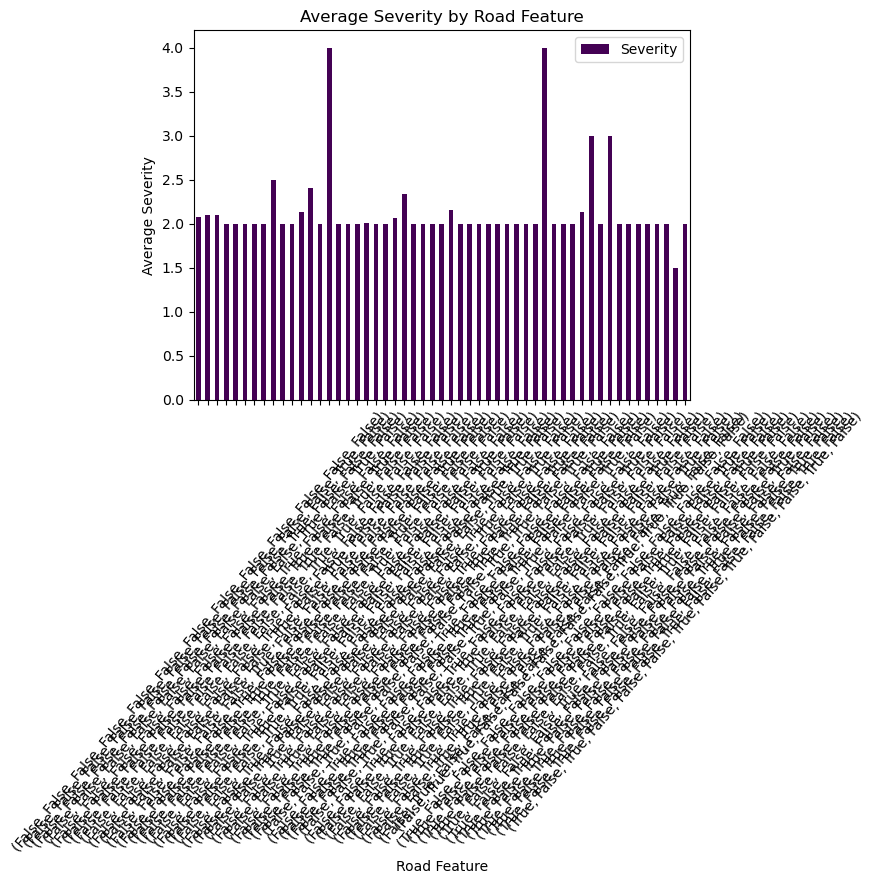

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
severity_by_road = df1.groupby(d_road).agg({'Severity': 'mean'})
severity_by_road
plt.figure(figsize=(12, 8))
severity_by_road.plot(kind='bar', colormap ='viridis')
plt.title('Average Severity by Road Feature')
plt.xlabel('Road Feature')
plt.ylabel('Average Severity')
plt.xticks(rotation= 50)
plt.show()

In [30]:

df1['Start_Time'].dtypes
df1['End_Time'].dtypes


dtype('O')

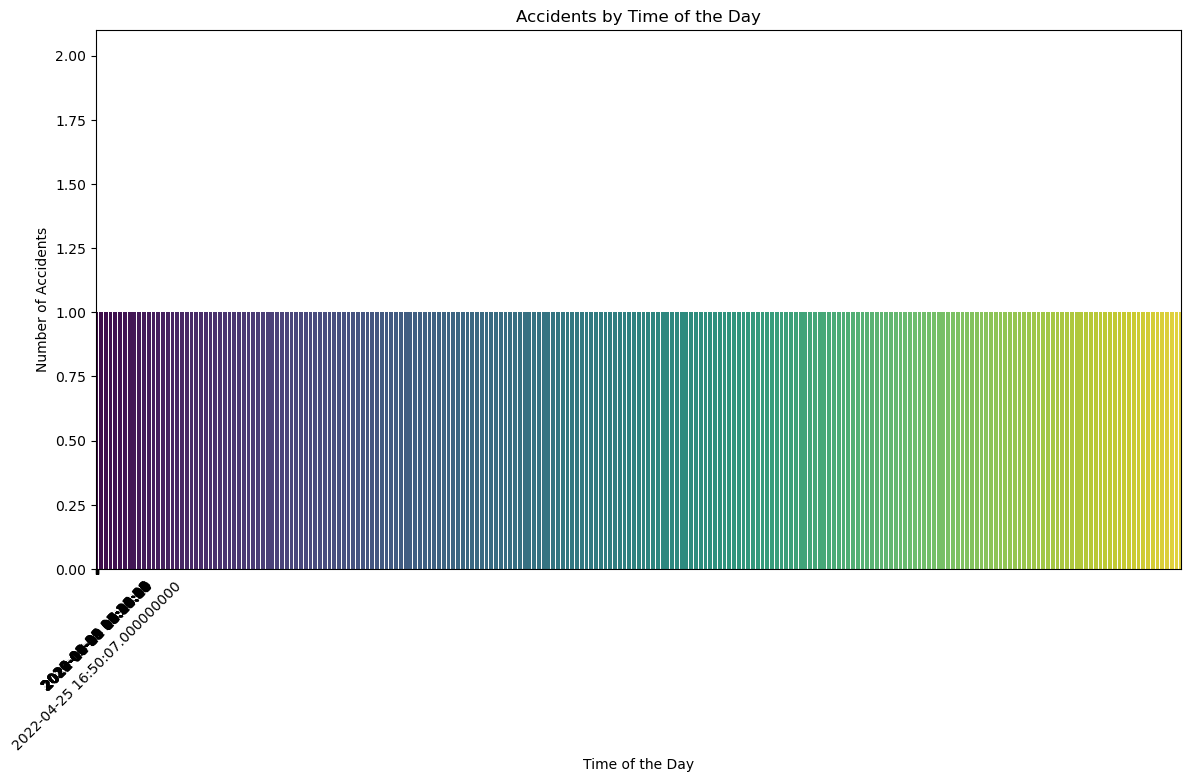

In [31]:


plt.figure(figsize=(14, 7))
sns.countplot(data=data, x='Start_Time', palette='viridis')
plt.title('Accidents by Time of the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24), rotation=45)
plt.show()





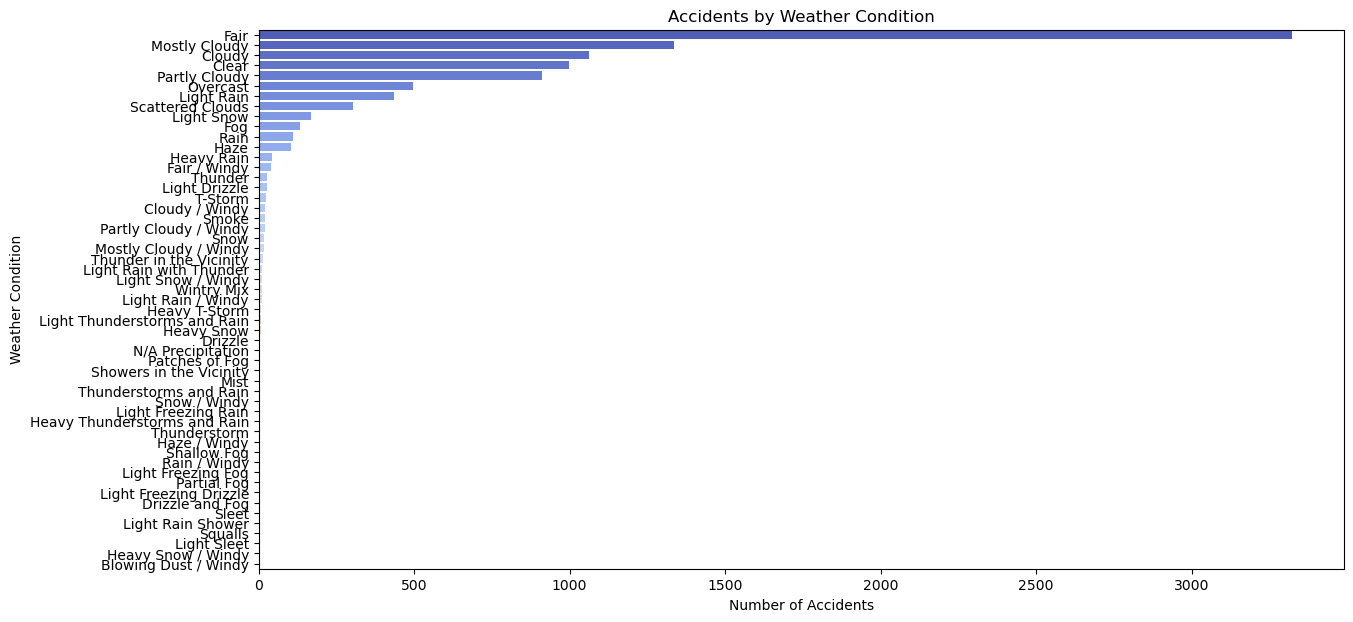

In [32]:


plt.figure(figsize=(14, 7))
sns.countplot(data=data, y='Weather_Condition', palette='coolwarm', order=data['Weather_Condition'].value_counts().index)
plt.title('Accidents by Weather Condition')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()



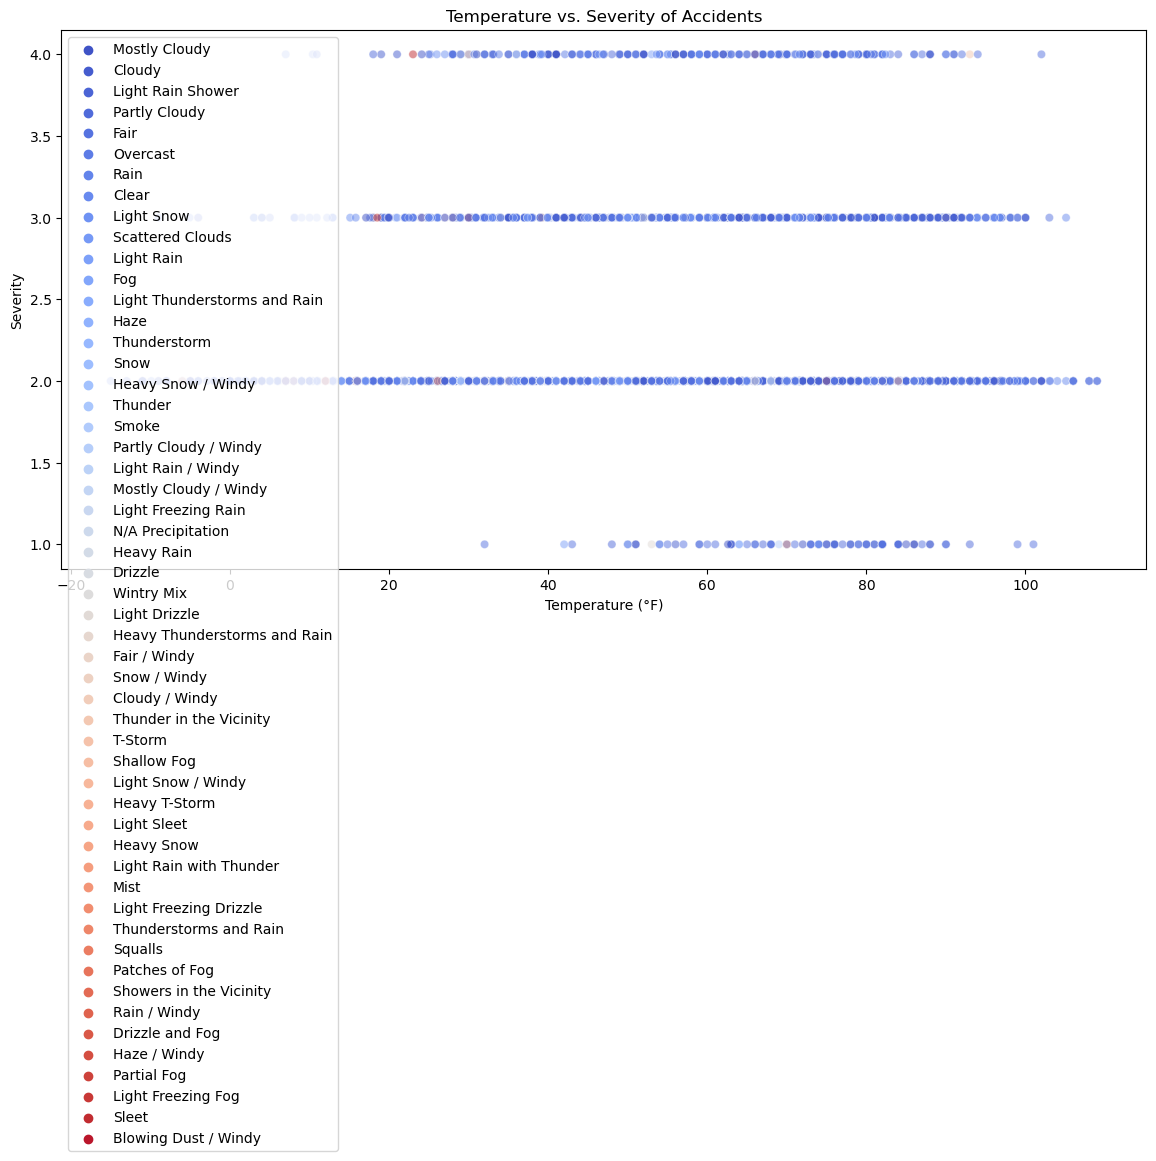

In [33]:


plt.figure(figsize=(14, 7))
sns.scatterplot(data=data, x='Temperature(F)', y='Severity', alpha=0.5, palette='coolwarm', hue='Weather_Condition')
plt.title('Temperature vs. Severity of Accidents')
plt.xlabel('Temperature (°F)')
plt.ylabel('Severity')
plt.legend(loc='best')
plt.show()

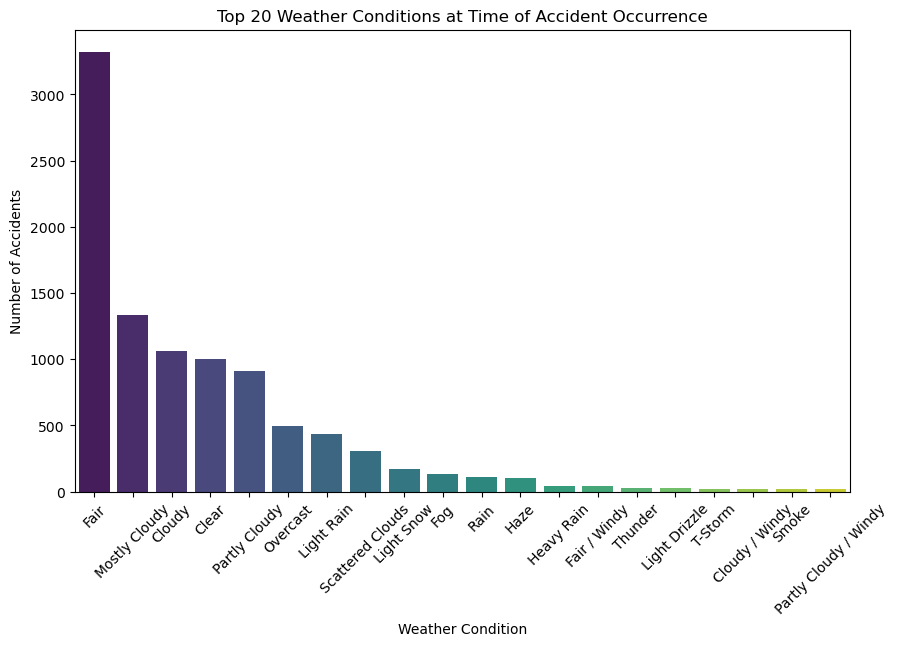

In [34]:

weather_counts = data['Weather_Condition'].value_counts()
top_weather_conditions = weather_counts.sort_values(ascending=False)[:20]


plt.figure(figsize=(10, 6))
sns.barplot(x=top_weather_conditions.index, y=top_weather_conditions.values, palette='viridis')

plt.title('Top 20 Weather Conditions at Time of Accident Occurrence')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')

plt.xticks(rotation=45)
plt.show()



<Axes: xlabel='Severity', ylabel='Start_Lat'>

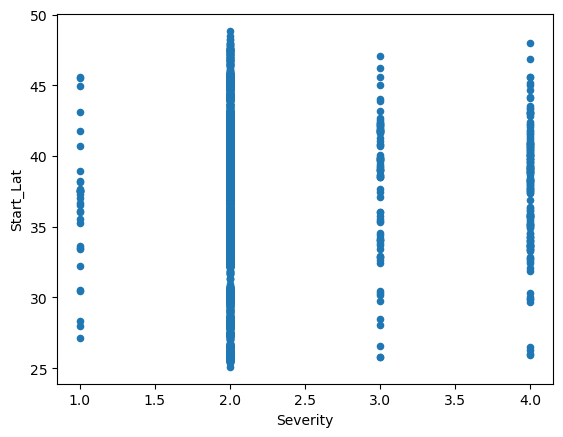

In [35]:
df1.plot(kind='scatter', y='Start_Lat', x='Severity')

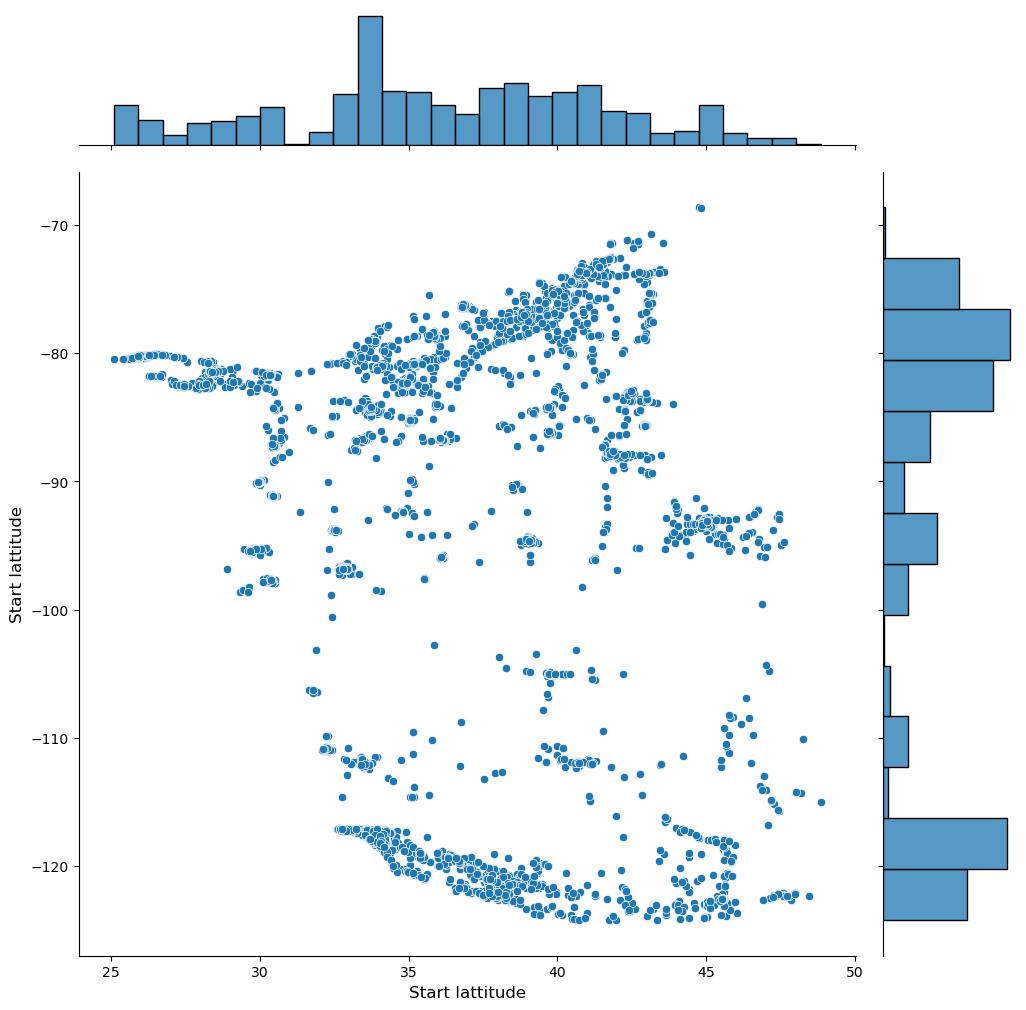

In [36]:
sns.jointplot(x=df1.Start_Lat.values , y=df1.Start_Lng.values,height=10)
plt.ylabel('Start lattitude', fontsize=12)
plt.xlabel('Start lattitude', fontsize=12)
plt.show()

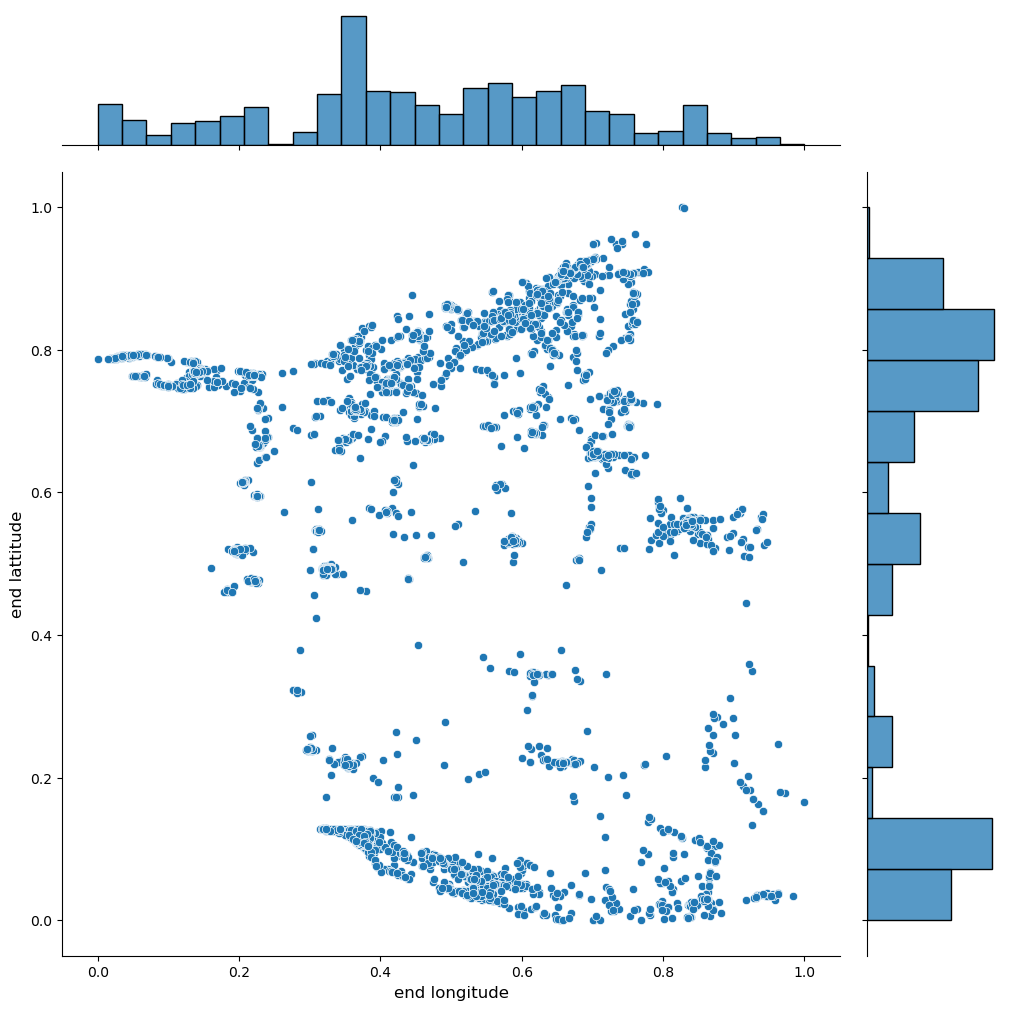

In [37]:
sns.jointplot(x=df1.End_Lat.values , y=df1.End_Lng.values,height=10)
plt.ylabel('end lattitude', fontsize=12)
plt.xlabel('end longitude', fontsize=12)
plt.show()

In [38]:
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[data['Start_Lat'].mean(), data['Start_Lng'].mean()], zoom_start=12, tiles='Stamen Terrain')


heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in data.iterrows()]
HeatMap(heat_data).add_to(m)


m.save('accident_heatmap.html')

print(m)


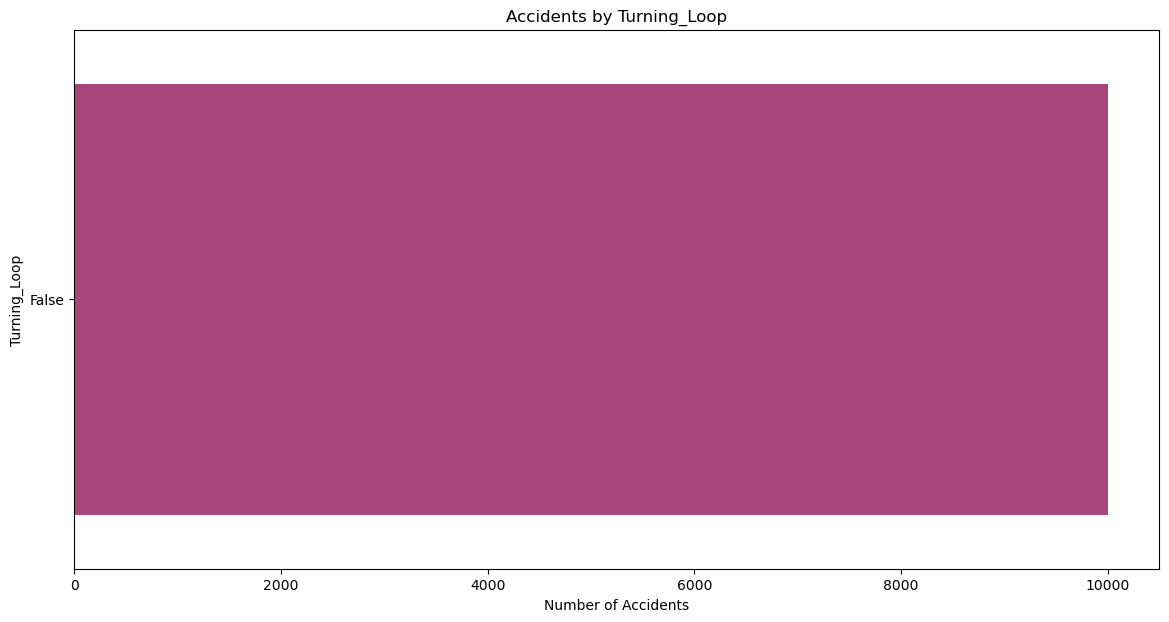

In [39]:
plt.figure(figsize=(14, 7))
sns.countplot(data= data, y='Turning_Loop', palette='magma', order=data['Turning_Loop'].value_counts().index)
plt.title('Accidents by Turning_Loop')
plt.xlabel('Number of Accidents')
plt.ylabel('Turning_Loop')
plt.show()

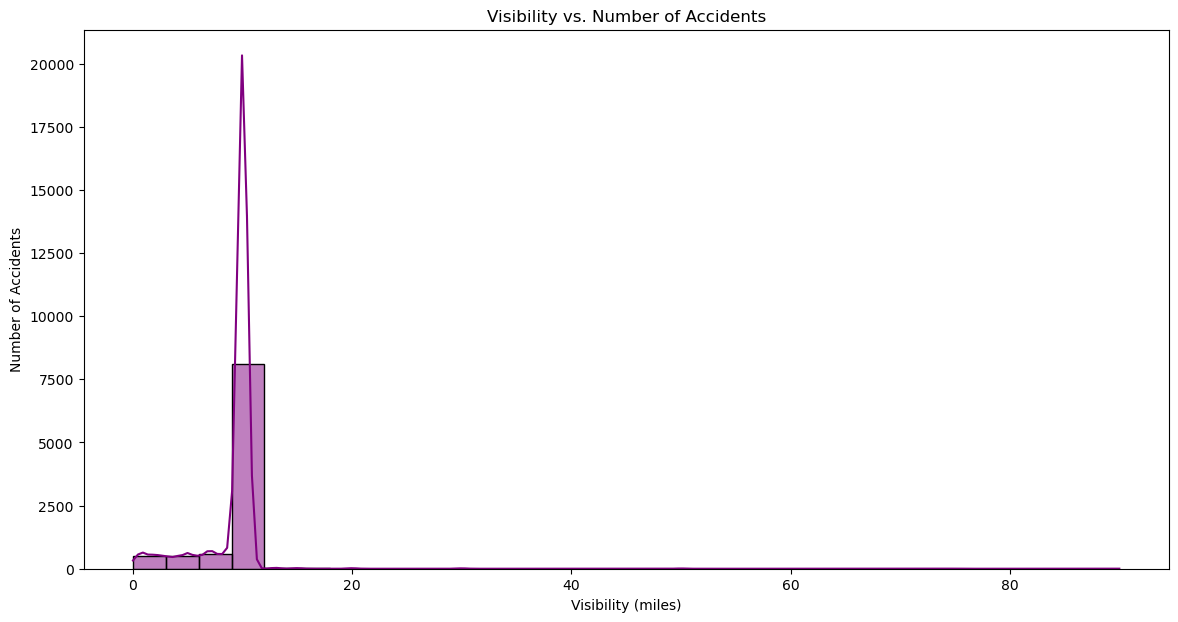

In [40]:
plt.figure(figsize=(14, 7))
sns.histplot(data=data, x='Visibility(mi)', bins=30, kde=True, color='purple')
plt.title('Visibility vs. Number of Accidents')
plt.xlabel('Visibility (miles)')
plt.ylabel('Number of Accidents')
plt.show()

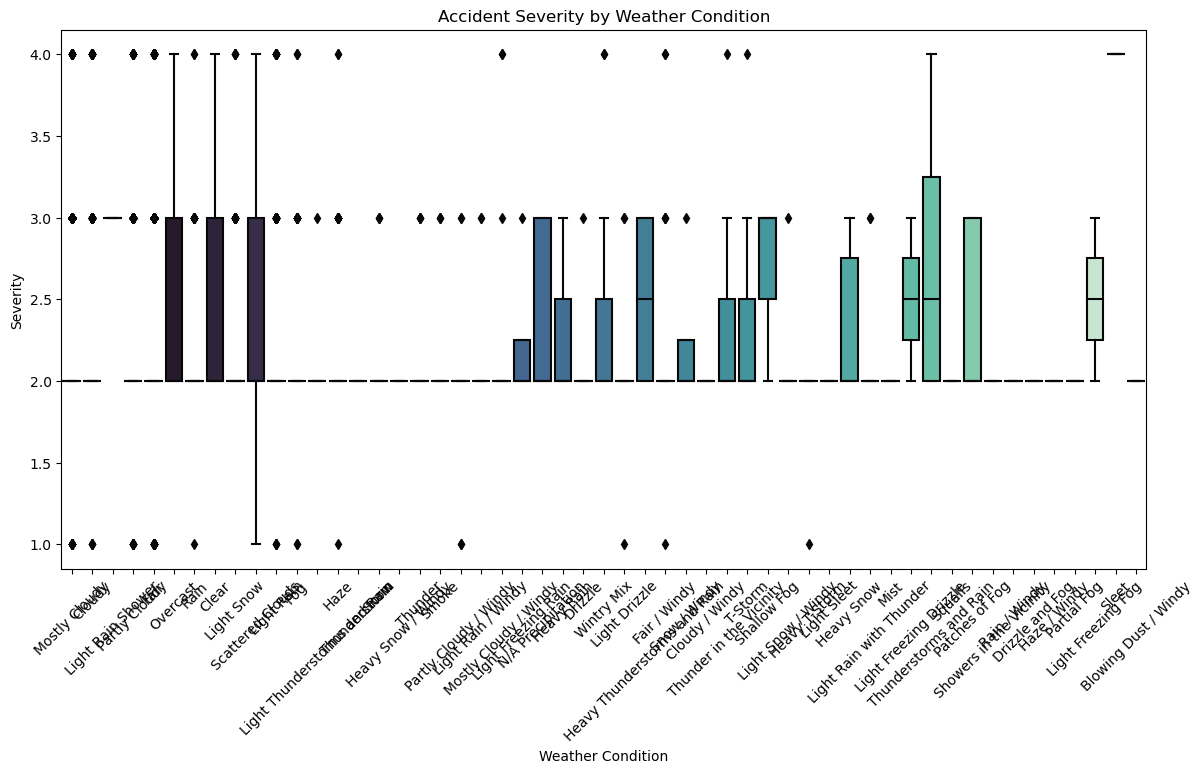

In [41]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='Weather_Condition', y='Severity', palette='mako')
plt.title('Accident Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Severity')
plt.xticks(rotation=45)
plt.show()

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Check if 'Weather_Condition' exists and clean column names
df1.columns = df1.columns.str.strip()  # Strip any leading or trailing spaces in column names

# Verify if 'Weather_Condition' exists in the DataFrame
if 'Weather_Condition' in df1.columns:
    # Encode categorical target variable (Weather_Condition) using Label Encoding
    label_encoder = LabelEncoder()
    df1['Weather_Condition'] = label_encoder.fit_transform(df1['Weather_Condition'])
else:
    print("'Weather_Condition' column is missing or has a different name.")
    # Optionally, list all columns to inspect
    print("Available columns:", df1.columns)

# Apply label encoding for other categorical features if they exist
categorical_columns = ['Street', 'City', 'Timezone', 'Airport_Code']  # Add more columns if needed
for col in categorical_columns:
    if col in df1.columns:
        df1[col] = label_encoder.fit_transform(df1[col])
    else:
        print(f"'{col}' column is missing or has a different name.")

# Step 3: Check if 'Weather_Condition' column exists before proceeding
if 'Weather_Condition' in df1.columns:
    # Feature Selection and Data Splitting
    X = df1.drop('Weather_Condition', axis=1)  # Features (excluding target variable)
    y = df1['Weather_Condition']  # Target variable (Weather_Condition)

    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 4: Train a Classifier (Random Forest)
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Step 5: Make Predictions and Evaluate the Model
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model's accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Detailed classification report
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
else:
    print("The 'Weather_Condition' column is not available for feature extraction.")


'Weather_Condition' column is missing or has a different name.
Available columns: Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       ...
       'Weather_Condition_Snow', 'Weather_Condition_Snow / Windy',
       'Weather_Condition_T-Storm', 'Weather_Condition_Thunder',
       'Weather_Condition_Thunder in the Vicinity',
       'Weather_Condition_Wintry Mix', 'Sunrise_Sunset_Night',
       'Civil_Twilight_Night', 'Nautical_Twilight_Night',
       'Astronomical_Twilight_Night'],
      dtype='object', length=5471)
'Street' column is missing or has a different name.
'City' column is missing or has a different name.
'Timezone' column is missing or has a different name.
'Airport_Code' column is missing or has a different name.
The 'Weather_Condition' column is not available for feature extraction.


The Random Forest algorithm is used in this code for the purpose of predicting the weather condition (Weather_Condition) based on other features in the dataset. In this context, Random Forest is applied as a classification model to determine which weather condition (e.g., "sunny", "rainy", "cloudy", etc.) corresponds to a given set of features (e.g., street, city, airport code, timezone, etc.).

Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

         Low       1.00      1.00      1.00       627

    accuracy                           1.00       627
   macro avg       1.00      1.00      1.00       627
weighted avg       1.00      1.00      1.00       627



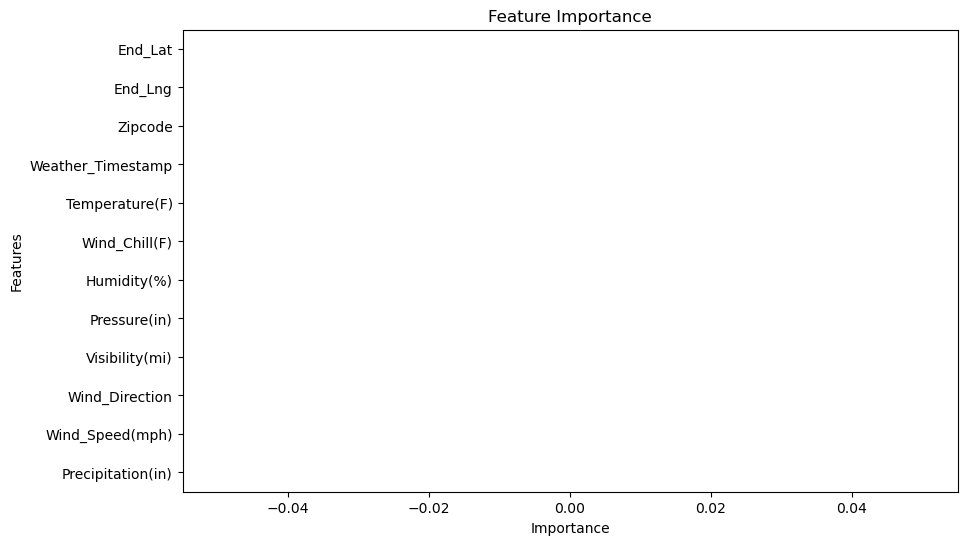

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Clean column names
df1.columns = df1.columns.str.strip()

# Define the feature columns (excluding 'Weather_Condition' and target column)
feature_columns = [
    'End_Lat', 'End_Lng', 'Street', 'City', 'Zipcode', 'Timezone', 'Airport_Code', 
    'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
    'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 
    'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'
]

# Select target variable
target_variable = 'Temperature(F)'

# Step 1: Clean and encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()

# Only apply encoding if the column exists in the dataset
categorical_columns = ['Street', 'City', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 
                       'Wind_Direction', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

# Encode only the columns that exist in the dataframe
for col in categorical_columns:
    if col in df1.columns:
        df1[col] = label_encoder.fit_transform(df1[col])
    else:
        print(f"Warning: Column '{col}' not found. Skipping encoding for this column.")

# Step 2: Convert 'Zipcode' or any other columns that are treated as strings to numeric (if applicable)
if 'Zipcode' in df1.columns:
    # You could drop it or encode it if necessary
    df1['Zipcode'] = pd.to_numeric(df1['Zipcode'], errors='coerce')  # Coerce errors to NaN

# Step 3: Filter the feature_columns to include only those present in the DataFrame
available_feature_columns = [col for col in feature_columns if col in df1.columns]

# Step 4: Drop rows with missing values in the target or features
df1 = df1.dropna(subset=[target_variable] + available_feature_columns)

X = df1[available_feature_columns]  # Features
y = df1[target_variable]  # Target

# Step 5: Convert the target variable to a classification-friendly format (e.g., discretizing temperature ranges)
y = pd.cut(y, bins=[-float('inf'), 32, 50, 70, 90, float('inf')], labels=["Low", "Cool", "Warm", "Hot", "Very Hot"])

# Step 6: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 8: Make Predictions
y_pred = rf_classifier.predict(X_test)

# Step 9: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 10: Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Feature Importance (to understand which features were important in the model)
importances = rf_classifier.feature_importances_
features = X.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


The main goal of this model is to predict temperature categories using a Random Forest Classifier. The key features in the model are environmental data points like latitude, longitude, weather conditions, and other attributes that influence temperature. By discretizing the target variable (temperature) into categories, the problem becomes a classification task, where the model is trained to predict which temperature category the data falls into.

In [44]:

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Check the available columns
print("Available columns:", df1.columns)


Available columns: Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       ...
       'Weather_Condition_Snow', 'Weather_Condition_Snow / Windy',
       'Weather_Condition_T-Storm', 'Weather_Condition_Thunder',
       'Weather_Condition_Thunder in the Vicinity',
       'Weather_Condition_Wintry Mix', 'Sunrise_Sunset_Night',
       'Civil_Twilight_Night', 'Nautical_Twilight_Night',
       'Astronomical_Twilight_Night'],
      dtype='object', length=5471)


In [45]:
# Drop irrelevant columns, ignoring errors if columns are not found
irrelevant_columns = [
    'ID', 'Source', 'Start_Time', 'End_Time', 'Description', 'Street', 
    'Zipcode', 'Weather_Timestamp', 'Country', 'Airport_Code'
]

df1 = df1.drop(columns=irrelevant_columns, errors='ignore')

# Verify the remaining columns
print("Remaining columns:", df1.columns)

Remaining columns: Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'County', 'State', 'Temperature(F)', 'Wind_Chill(F)',
       ...
       'Weather_Condition_Snow', 'Weather_Condition_Snow / Windy',
       'Weather_Condition_T-Storm', 'Weather_Condition_Thunder',
       'Weather_Condition_Thunder in the Vicinity',
       'Weather_Condition_Wintry Mix', 'Sunrise_Sunset_Night',
       'Civil_Twilight_Night', 'Nautical_Twilight_Night',
       'Astronomical_Twilight_Night'],
      dtype='object', length=5463)


In [46]:
# Step 4: Encode categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Store encoders for inverse transformation if needed



In [47]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


# Separate numeric and categorical columns
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Convert numeric columns to proper numeric types, handling any invalid values
data[numeric_features] = data[numeric_features].apply(pd.to_numeric, errors='coerce')

# Handle NaN values in numeric columns (filling with mean for simplicity)
data[numeric_features] = data[numeric_features].fillna(data[numeric_features].mean())

# Handle NaN values in categorical columns (filling with mode)
data[categorical_features] = data[categorical_features].apply(lambda x: x.fillna(x.mode()[0]))

# Encode the target variable (if it's categorical)
y = LabelEncoder().fit_transform(data['Severity'])

# Define features (X) and target (y)
X = data.drop('Severity', axis=1)

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing: Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing pipeline for both numeric and categorical features
# Numeric columns will be scaled using StandardScaler, and categorical columns will be encoded using OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Create a pipeline that first preprocesses the data and then applies the Random Forest model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Hyperparameter tuning using GridSearchCV (if needed)
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}





Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Start_Lat',
                                                                          'Start_Lng',
                                                                          'End_Lat',
                                                                          'End_Lng',
                                                                          'Distance(mi)',
                                                                          'Temperature(F)',
                                                                          'Wind_Chill(F)',
                                                                          'Humidity(%)',
                                                                          'Pressure(in)',
                                                                          'Visibility(mi)',
                                                                          'Wind_Speed(mph)',
                                                                          'Precipitation(in)']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         [])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             verbose=2)

In [48]:
# Best parameters found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")




Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}


In [51]:
# Create the pipeline for preprocessing and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Perform Grid Search on the pipeline
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit Grid Search (includes fitting preprocessing and classifier)
grid_search.fit(X_train, y_train)

# The best estimator after Grid Search
best_rf_model = grid_search.best_estimator_

# Model Evaluation
y_pred = best_rf_model.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Adjusted for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print Evaluation Metrics and Classification Report
print(f"\nModel Evaluation:\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 24 candidates, totalling 72 fits

Model Evaluation:
Accuracy: 0.8147
Precision: 0.7732
Recall: 0.8147
F1 Score: 0.7736

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.83      0.96      0.89      2410
           2       0.58      0.25      0.35       472
           3       0.50      0.01      0.02        82

    accuracy                           0.81      3000
   macro avg       0.48      0.31      0.32      3000
weighted avg       0.77      0.81      0.77      3000



In [52]:

# Displaying key metrics
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")



Accuracy: 0.8147
Precision: 0.7732
Recall: 0.8147
F1-Score: 0.7736


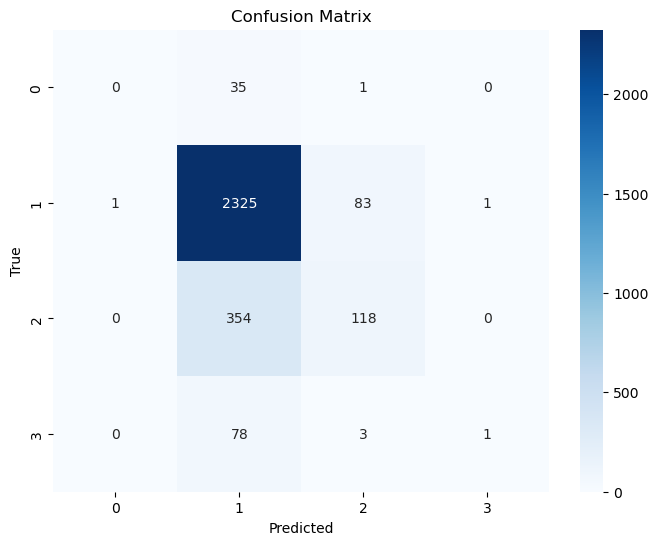

In [53]:


# Confusion Matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [54]:

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns



# Inspect the dataset
print(data.info())

# Select relevant features for clustering
# Choosing features like Start_Lat, Start_Lng, Weather_Condition, and Severity
columns_to_use = ['Start_Lat', 'Start_Lng', 'Severity', 'Weather_Condition']
selected_data = data[columns_to_use]

# Handle missing values
selected_data.dropna(inplace=True)

# Encode categorical variables (e.g., Weather_Condition)
label_encoder = LabelEncoder()
selected_data['Weather_Condition'] = label_encoder.fit_transform(selected_data['Weather_Condition'])

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)




<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 7039365 to 6719466
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10000 non-null  int32  
 1   Source                 10000 non-null  int32  
 2   Severity               10000 non-null  int64  
 3   Start_Time             10000 non-null  int32  
 4   End_Time               10000 non-null  int32  
 5   Start_Lat              10000 non-null  float64
 6   Start_Lng              10000 non-null  float64
 7   End_Lat                10000 non-null  float64
 8   End_Lng                10000 non-null  float64
 9   Distance(mi)           10000 non-null  float64
 10  Description            10000 non-null  int32  
 11  Street                 10000 non-null  int32  
 12  City                   10000 non-null  int32  
 13  County                 10000 non-null  int32  
 14  State                  10000 non-null  int32  
 15 

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9044\2686543904.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data.dropna(inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9044\2686543904.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Weather_Condition'] = label_encoder.fit_transform(selected_data['Weather_Condition'])


C:\Users\lenovo\AppData\Local\Temp\ipykernel_9044\4267889395.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['KMeans_Cluster'] = kmeans_labels


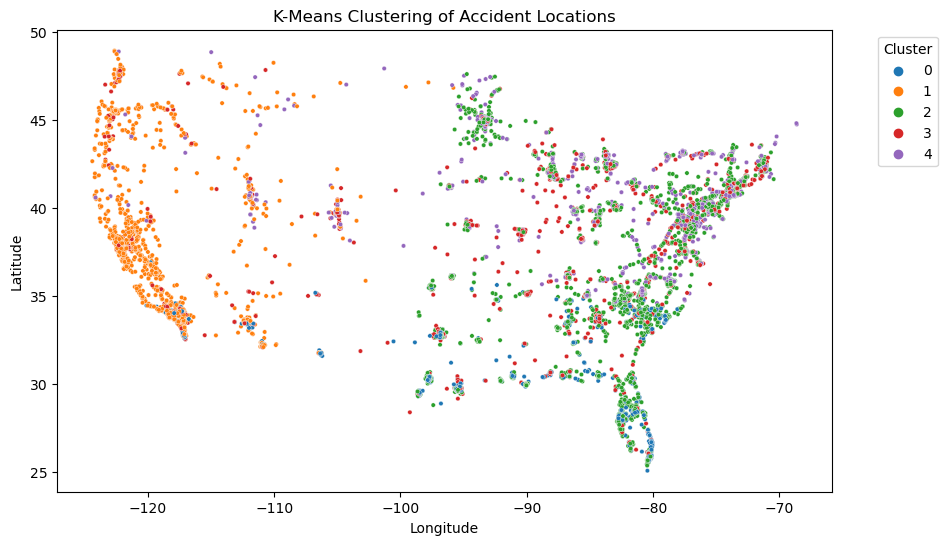

In [55]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
selected_data['KMeans_Cluster'] = kmeans_labels


# Visualize K-Means Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=selected_data['Start_Lng'],
    y=selected_data['Start_Lat'],
    hue=selected_data['KMeans_Cluster'],
    palette='tab10',
    s=10
)
plt.title('K-Means Clustering of Accident Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



C:\Users\lenovo\AppData\Local\Temp\ipykernel_9044\1394462265.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['DBSCAN_Cluster'] = dbscan_labels


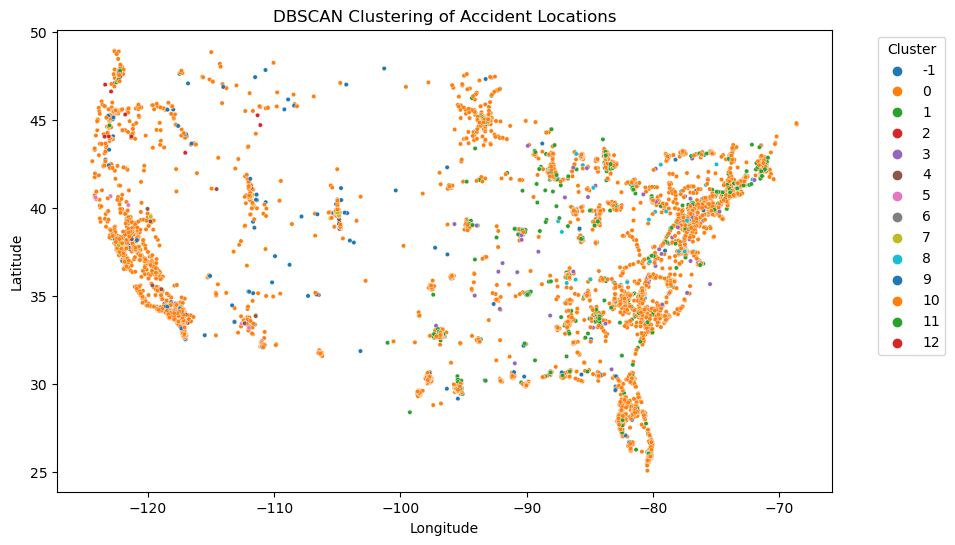

In [56]:
# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(scaled_data)
selected_data['DBSCAN_Cluster'] = dbscan_labels
# Visualize DBSCAN Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=selected_data['Start_Lng'],
    y=selected_data['Start_Lat'],
    hue=selected_data['DBSCAN_Cluster'],
    palette='tab10',
    s=10
)
plt.title('DBSCAN Clustering of Accident Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [58]:
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Create the main application window
class DataMiningApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Data Mining GUI")
        self.root.geometry("800x600")
        self.root.config(bg="#f2f2f2")  # Set background color
        
        # Initialize attributes
        self.df = None
        self.model = None
        
        # Create frames for better layout
        self.button_frame = tk.Frame(root, bg="#f2f2f2")
        self.button_frame.pack(pady=20)

        self.result_frame = tk.Frame(root, bg="#f2f2f2")
        self.result_frame.pack(pady=10)

        # Add buttons with colorful design
        self.upload_button = tk.Button(self.button_frame, text="Upload Dataset", command=self.upload_dataset,
                                       bg="#4CAF50", fg="white", font=("Arial", 12), relief="raised", padx=20, pady=10)
        self.upload_button.grid(row=0, column=0, padx=10)

        self.kaggle_button = tk.Button(self.button_frame, text="Download from Kaggle", command=self.download_from_kaggle,
                                       bg="#FF5722", fg="white", font=("Arial", 12), relief="raised", padx=20, pady=10)
        self.kaggle_button.grid(row=0, column=1, padx=10)

        self.summary_button = tk.Button(self.button_frame, text="Show Data Summary", command=self.show_data_summary,
                                        bg="#2196F3", fg="white", font=("Arial", 12), relief="raised", padx=20, pady=10)
        self.summary_button.grid(row=1, column=0, padx=10)

        self.run_model_button = tk.Button(self.button_frame, text="Run Classification Model", command=self.run_classification_model,
                                          bg="#FFC107", fg="white", font=("Arial", 12), relief="raised", padx=20, pady=10)
        self.run_model_button.grid(row=1, column=1, padx=10)

        self.plot_button = tk.Button(self.button_frame, text="Show Feature Importance", command=self.plot_feature_importance,
                                     bg="#9C27B0", fg="white", font=("Arial", 12), relief="raised", padx=20, pady=10)
        self.plot_button.grid(row=2, column=0, padx=10)

        # Add label for displaying results with improved appearance
        self.result_label = tk.Label(self.result_frame, text="Model Accuracy: N/A", font=("Arial", 16, "bold"), fg="#333333", bg="#f2f2f2")
        self.result_label.pack()

    def upload_dataset(self):
        # Open a file dialog to select a CSV file
        file_path = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv")])
        if file_path:
            # Load the dataset into a DataFrame
            self.df = pd.read_csv(file_path)
            messagebox.showinfo("Success", "Dataset uploaded successfully!")

    def download_from_kaggle(self):
        dataset_name = "your-kaggle-dataset-name"  # Replace with the actual Kaggle dataset name, e.g., "zillow/zecon"
        save_path = "data"  # Define where you want to save the dataset

        if not os.path.exists(save_path):
            os.makedirs(save_path)

        try:
            # Initialize Kaggle API
            api = KaggleApi()
            api.authenticate()

            # Download the dataset
            api.dataset_download_files(dataset_name, path=save_path, unzip=True)

            messagebox.showinfo("Success", "Dataset downloaded successfully from Kaggle!")

            # Assuming the dataset is in CSV format, load it into the DataFrame
            dataset_file = os.path.join(save_path, "dataset.csv")  # Replace with the correct filename if different
            self.df = pd.read_csv(dataset_file)

        except Exception as e:
            messagebox.showerror("Error", f"Failed to download the dataset: {e}")

    def show_data_summary(self):
        if self.df is not None:
            # Show basic statistics and display a bar chart for the numeric data
            summary = self.df.describe()
            print(summary)
            messagebox.showinfo("Data Summary", str(summary))

            # Plot a correlation matrix
            plt.figure(figsize=(10, 6))
            corr = self.df.corr()
            sns.heatmap(corr, annot=True, cmap="coolwarm")
            plt.title("Correlation Matrix")
            plt.show()
        else:
            messagebox.showerror("Error", "Please upload a dataset first.")

    def run_classification_model(self):
        if self.df is not None:
            # Assuming 'target' is the column to predict; replace with your actual target column name
            X = self.df.drop(columns=['target'])
            y = self.df['target']

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Create and train a Random Forest Classifier
            self.model = RandomForestClassifier()
            self.model.fit(X_train, y_train)

            # Predict on the test data
            y_pred = self.model.predict(X_test)

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)
            self.result_label.config(text=f"Model Accuracy: {accuracy:.2f}", fg="#4CAF50")  # Green color for accuracy
        else:
            messagebox.showerror("Error", "Please upload a dataset first.")

    def plot_feature_importance(self):
        if self.model is not None:
            # Plot feature importance after model training
            importance = self.model.feature_importances_
            feature_names = self.df.drop(columns=['target']).columns
            feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
            feature_df = feature_df.sort_values(by='Importance', ascending=False)

            plt.figure(figsize=(10, 6))
            plt.barh(feature_df['Feature'], feature_df['Importance'], color="#FF5722")
            plt.xlabel('Importance')
            plt.ylabel('Feature')
            plt.title('Feature Importance - Random Forest')
            plt.show()
        else:
            messagebox.showerror("Error", "Please run a model first.")

# Run the application
if __name__ == "__main__":
    root = tk.Tk()
    app = DataMiningApp(root)
    root.mainloop()
